## import python-library

In [1]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import glob
from tensorflow import keras
from keras.layers.core import Dense 
from tensorflow.keras.layers import Input
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

gc(garbage collector) managing memory  

In [2]:
import gc 
gc.enable()

In [57]:
random.seed(30)   # used for random choice from dataset

In [4]:
root_dir = os.getcwd()  #corrent directory
print(root_dir)

H:\project_jamalian\image\model


## Loading images and labels
#### first collecting paths to all the normal and abnormal mlspectograms

In [5]:
normal_files_path = []  
for filename in glob.glob(f'{root_dir}/**/normals/*.png', recursive=True): # all normals path
    normal_files_path.append(filename)
    
abnormal_files_path = []
for filename in glob.glob(f'{root_dir}/**/abnormals/*.png', recursive=True): # all abnormals path
    abnormal_files_path.append(filename)

In [6]:
print(f'count of all normals: {len(normal_files_path)}' )
print(f'count of all abnormals: {len(abnormal_files_path)}' )

count of all normals: 44157
count of all abnormals: 8848


#### As it is shown below with an example, we can access machine type and ab and fileName thorough names of folders that spectograms are saved in. this will be used in saving detail of each spectogram.

In [59]:
machine_type =   os.path.split(os.path.split(os.path.split(os.path.split(normal_files_path[0])[0])[0])[0])[1]
db           =   os.path.split(os.path.split(os.path.split(normal_files_path[0])[0])[0])[1]
fileName     =   os.path.split(normal_files_path[0])[1]

print(machine_type)
print(db)
print(fileName)

NameError: name 'normal_files_path' is not defined

### selecting subset of dataset:

number of spectograms in base dataset:

    normals  : 44157
    
    abnormals: 8848
        
But due to shortage of hardware, 

    normals  : 8000
    
    abnormals: 1000

will be select randomly. 

In [13]:
resize_scale = 50     # down scaling images (in percent)

numberOfabnormalsInDataset = 1000  
numberOfnormalsInDataset = 8000

### creating X and y:
Reading images -->  Save as numpy in X -->  Save Respective y -->  Save Respective detail ( machine_type & db & fileName )

In [14]:
y = [] # TARGET, actual value (abnormal = 1 , normal = 0)
X = [] # FEATURES, spectograms (input images)

detail = [] #machine_type & db & fileName

In [60]:
#normals:
normals_spectrograms=[]
for image_path in random.choices(normal_files_path, k=numberOfnormalsInDataset): #select randomly from paths.
    try:
        machine_type = os.path.split(os.path.split(os.path.split(os.path.split(image_path)[0])[0])[0])[1]
        db = os.path.split(os.path.split(os.path.split(image_path)[0])[0])[1]
        file_name = os.path.split(image_path)[1]   


        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)

        width = int(image.shape[1] * resize_scale / 100)
        height = int(image.shape[0] * resize_scale / 100)
        dim = (width, height)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)  #down sizing images (memory)


        image= np.array(image)
        image = image.astype('float32')
        image /= 255                          # normalaizing the data  (divide by maximum)
        X.append(image)                       # adding the image to features
        normals_spectrograms.append(image)
        tmp = [machine_type, db, file_name]
        detail.append(tmp)                   # saving detail
        y.append(0) #normal                  # save Target
    except:
        print(image_path) #in case of occuring a error in reading file


NameError: name 'normal_files_path' is not defined

In [61]:
#abnormals:
abnormals_spectrograms=[]
for image_path in random.choices(abnormal_files_path, k=numberOfabnormalsInDataset): #select randomly from paths.
    try:
        machine_type = os.path.split(os.path.split(os.path.split(os.path.split(image_path)[0])[0])[0])[1]
        db = os.path.split(os.path.split(os.path.split(image_path)[0])[0])[1]
        file_name = os.path.split(image_path)[1]   


        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)

        width = int(image.shape[1] * resize_scale / 100)
        height = int(image.shape[0] * resize_scale / 100)
        dim = (width, height)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) #down sizing images (memory)


        image= np.array(image)
        image = image.astype('float32')
        image /= 255                                        # normalaizing the data  (divide by maximum)
        X.append(image)                                     # adding the image to features
        abnormals_spectrograms.append(image)
        tmp = [machine_type, db, file_name]
        detail.append(tmp)                                  # saving detail
        y.append(1) #abnormal                               # save Target
    except:
        print(image_path)    #in case of occuring a error in reading file


NameError: name 'abnormal_files_path' is not defined

### Test:

In [17]:
print(X[5])
print("======================================================================")
print(y[5])
print("======================================================================")
print(detail[5])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
0
['fan', '6db', '3888.png']


### saving numpys to save time in future attempts

In [20]:
np.save("normals_spectrograms.npy", normals_spectrograms)
#normals_spectrograms = np.load("normals_spectrograms.npy")

In [21]:
np.save("abnormals_spectrograms.npy", abnormals_spectrograms)
#abnormals_spectrograms = np.load("abnormals_spectrograms.npy")

In [22]:
np.save("features.npy", X)
#X = np.load("features.npy")

In [23]:
np.save("target.npy", y)
#y = np.load("target.npy")

In [24]:
np.save("detail.npy", detail)
#detail = np.load("detail.npy")

In [25]:
del normal_files_path           #free up memory
del abnormal_files_path
gc.collect()        

184

In [26]:
X =np.array(X)
y =np.array(y)
print(y.shape)
print(X.shape)

(9000,)
(9000, 144, 216, 3)


# split Dataset:

20% Test data

80% train data



In [28]:
percentForTest = 20
# train_X      = X[:len(X)*(100-percentForTest)]
# train_y      = y[:len(X)*(100-percentForTest)]
# train_detail = detail[:len(X)*(100-percentForTest)]

# test_X       = X[len(X)*(100-percentForTest):]
# test_y       = y[len(X)*(100-percentForTest):]
# test_detail  = detail[len(X)*(100-percentForTest):]


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
_, _, detail_train, detail_test = train_test_split(X, detail, test_size=0.20, random_state=4)

MemoryError: Unable to allocate 641. MiB for an array with shape (1800, 144, 216, 3) and data type float32

In [56]:
print(X_train.shape)
print(X_test.shape)


(7200, 144, 216, 3)
(1800, 144, 216, 3)


# Transfer learning with vgg16

https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)  # customizing input 
base_model.trainable = False ## Not trainable weights

## Preprocessing input
X_train = preprocess_input(x_train) 
y_train = preprocess_input(y_train)

In [30]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 216, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 144, 216, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 144, 216, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 72, 108, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 72, 108, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 72, 108, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 36, 54, 128)       0     

### Addtinal layers to base model(VGG16) used for classification.

In [31]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()                             # transform to n * 1
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')     # it is a binary clasification hence sigmoid and not softmax


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [32]:
# train_y = np.asarray(y).astype('int').reshape((-1,1))
# test_y = np.asarray(y).astype('int').reshape((-1,1))

<a href="https://en.wikipedia.org/wiki/Early_stopping"> EarlyStopping </a>   is a form of regularization used to avoid   overfitting

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

r =model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es]) 
# 20% of train data will be used for validation
# if val_accuracy start to drop in epochs, training will be ended. (EarlyStopping)

NameError: name 'X_train' is not defined

### saving the model:

In [47]:
from keras.models import load_model
model.save(f'{root_dir}/my_model/')
# model = load_model(f'{root_dir}/my_model/')

INFO:tensorflow:Assets written to: H:\project_jamalian\image\model/my_model/assets


INFO:tensorflow:Assets written to: H:\project_jamalian\image\model/my_model/assets


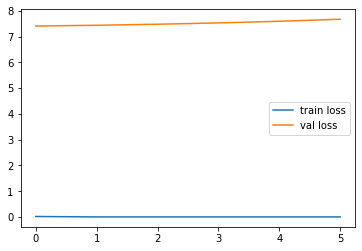

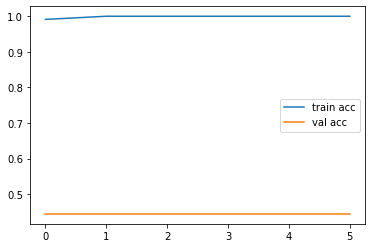

In [35]:
#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()